# **Mini-Project: Predicting Heart Disease Using Logistic Regression** #

How to handle real-world healthcare data.
Preprocessing data: Handling missing values, categorical variables, and feature scaling.
Training a logistic regression model to predict the presence of heart disease.
Evaluating the model’s performance using accuracy, precision, recall, and the F1 score.

Python: A popular programming language for data analysis and machine learning.
scikit-learn: Provides tools for data mining and data analysis, including logistic regression.
pandas: For data manipulation and analysis.
matplotlib and seaborn: For data visualization.
Jupyter Notebook or any Python IDE.

Task
Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

1. Data Preparation:

Download the “Heart Disease UCI” dataset.
Perform exploratory data analysis (EDA) to understand the dataset.
Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.
2. Model Training:

Split the dataset into a training set and a testing set.
Train a logistic regression model on the training set.
3. Model Evaluation:

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.

Expected Deliverables
A Jupyter Notebook containing:

The EDA and preprocessing steps.
The code for training and evaluating the logistic regression model.
A confusion matrix and classification report for model evaluation.
Any visualizations that helped you understand the dataset and the model’s performance.

# *Importation des bibliothèques* #

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [111]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

# *Data Preparation* #

### ****Download the “Heart Disease UCI” dataset**** ###

In [112]:
df = pd.read_csv('heart_disease_uci.csv')

In [113]:
df['num'] = df['num'].astype(int)

In [114]:
print(df['num'].dtype)

int64


In [115]:
print(df['num'])

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64


### ****Perform exploratory data analysis (EDA)**** ##

In [116]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [117]:
print(df.tail())

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak slope  ca          thal  num  
915  st-t abnormality   154.0  False      0.0   NaN NaN           NaN    1  
916  st-t abnormality     NaN    NaN      NaN   NaN NaN           NaN    0  
917  st-t abnormality   100.0  False      0.0   NaN NaN  fixed defect    2  
918    lv hypertrophy     NaN    NaN      NaN   NaN NaN           NaN    0  
919    lv hypertrophy    93.0   True      0.0   NaN NaN           NaN    1  


16 colonnes x 920 lignes
Recherche de maladie cardiaque
Variables significatives

### ****Preprocess the data:**** ##

##### *handle missing values if any* #####

Check for missing values in each column (number of NaN values in each column)

In [118]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Handle Missing Values

*Impute missing values*

For numerical columns :

In [119]:
from sklearn.impute import SimpleImputer

# Impute with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64']))


In [120]:
df['num'] = df['num'].astype(int)

In [121]:
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [122]:
print(df.columns.tolist())

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


For categorical columns (e.g. thal, sex, cp if encoded as strings or categories):

In [123]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object'])) 

In [124]:
#Double-check that all missing values are handled
print(df.isnull().sum().sum())  # Should return 0 if all missing values are handled

0


Result is 0, so all missing data has been handled.


##### *encode categorical variables* #####
For categorical columns, encoding must be applied, one-hot encoding or label encoding

To that effect, numerical and categorical columns must be separated.

In [125]:
# Numerical columns (int and float)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Supprimer 'num' si elle y est
if 'num' in numerical_cols:
    numerical_cols.remove('num')
# Categorical columns (object or category types)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print them
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [126]:
# Categorical variables encoding#
#importing libraries#
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**Remove categorical columns from numerical list**


In [127]:
# Columns to label encode
label_encode_cols = ['sex', 'dataset', 'cp', 'fbs', 'exang', 'slope']

In [128]:
# Columns to one-hot encode
onehot_encode_cols = ['restecg', 'thal']

In [129]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('label', OrdinalEncoder(), label_encode_cols),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_encode_cols)
    ]
)

In [130]:
#Apply the transformations
df_encoded_array = preprocessor.fit_transform(df)

In [131]:
#Build final feature names
# Get one-hot encoded column names
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_encode_cols)
all_columns = numerical_cols + label_encode_cols + list(onehot_feature_names)

In [132]:
# Create final encoded DataFrame
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)

In [133]:
df['num'] = df['num'].astype(int)

In [134]:
#Show the result
print(df_encoded.head())

    id   age  trestbps   chol  thalch  oldpeak   ca  sex  dataset   cp  fbs  \
0  1.0  63.0     145.0  233.0   150.0      2.3  0.0  1.0      0.0  3.0  1.0   
1  2.0  67.0     160.0  286.0   108.0      1.5  3.0  1.0      0.0  0.0  0.0   
2  3.0  67.0     120.0  229.0   129.0      2.6  2.0  1.0      0.0  0.0  0.0   
3  4.0  37.0     130.0  250.0   187.0      3.5  0.0  1.0      0.0  2.0  0.0   
4  5.0  41.0     130.0  204.0   172.0      1.4  0.0  0.0      0.0  1.0  0.0   

   exang  slope  restecg_normal  restecg_st-t abnormality  thal_normal  \
0    0.0    0.0             0.0                       0.0          0.0   
1    1.0    1.0             0.0                       0.0          1.0   
2    1.0    1.0             0.0                       0.0          0.0   
3    0.0    0.0             1.0                       0.0          1.0   
4    0.0    2.0             0.0                       0.0          1.0   

   thal_reversable defect  
0                     0.0  
1                     0.

##### *scale the features* #####
Utilisation de StandardScaler

In [135]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [136]:
#Full pipeline with scaler
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

### ****Visualizations**** ##

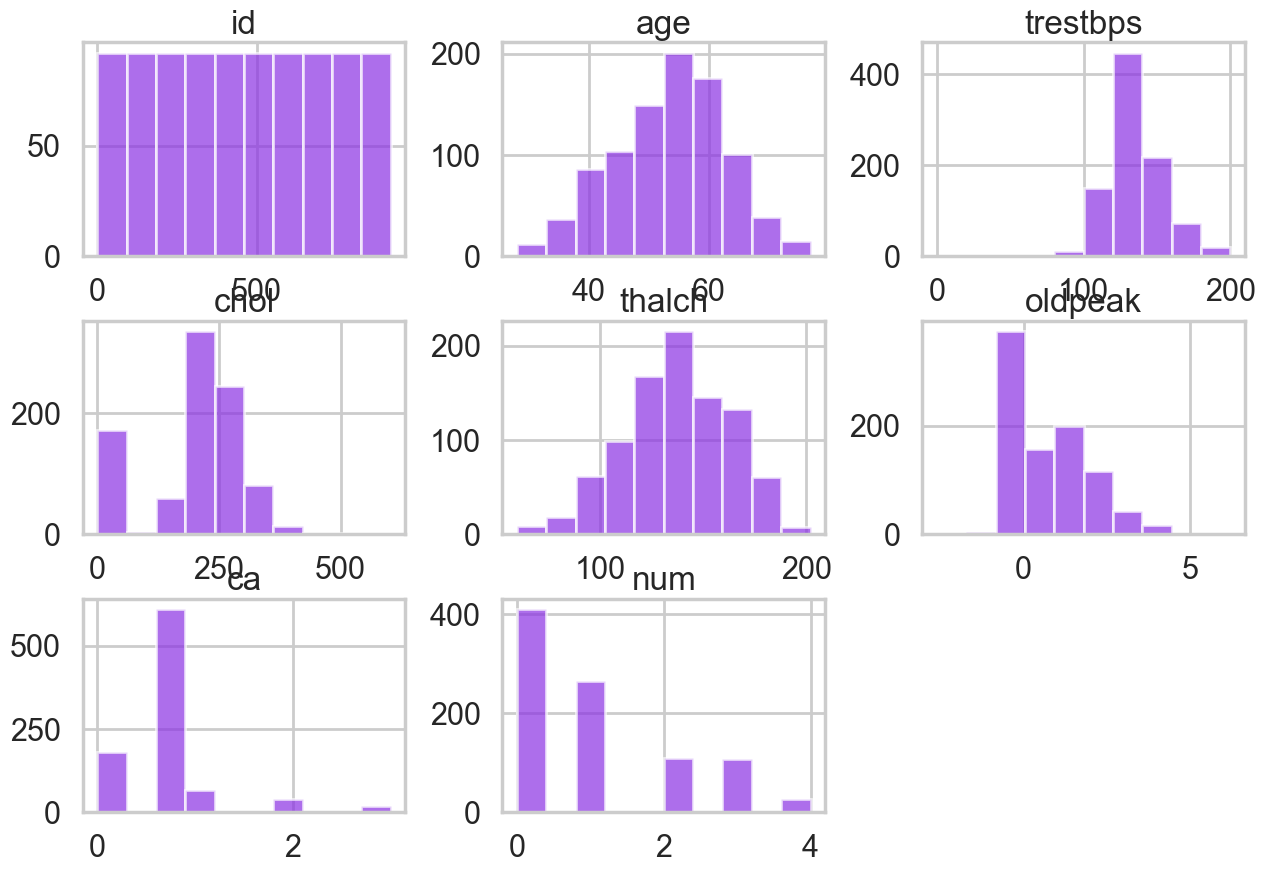

In [160]:
# plot histogram of all columns using sns
df.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

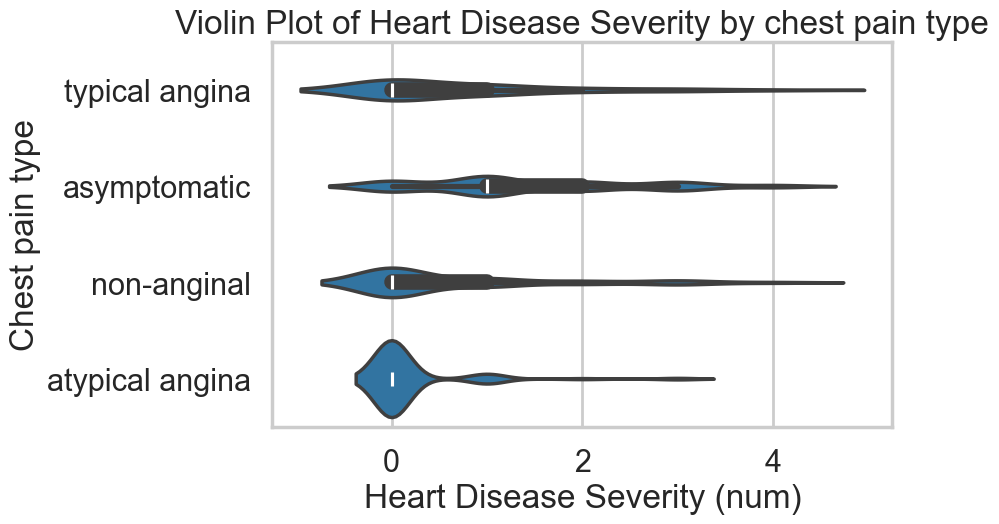

In [155]:
sns.violinplot(x='num', y='cp', data=df)
# Set the title and labels
plt.title('Violin Plot of Heart Disease Severity by chest pain type')
plt.ylabel('Chest pain type')
plt.xlabel('Heart Disease Severity (num)')

# Display the plot
plt.show()

# *Model Training* #

### ****Split the dataset into a training set and a testing set**** ##
Splitting the dataset with num as the target

In [137]:
# Séparer X et y (en gardant num en int64)
X = df.drop('num', axis=1)
y = df['num'].astype('int64')

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% des données pour le test
    random_state=42,      # pour la reproductibilité
    stratify=y            # optionnel mais recommandé pour préserver les proportions des classes
)


### ****Train a logistic regression model on the training set.**** ##

We shall use the training set (X_train, y_train), taking advantage of the previously built preprocessing pipeline (with encoding, imputation, and scaling).
It will be applied to the features before training the model.

1. Preprocess X_train and X_test using your full_pipeline
2. Train a Logistic Regression model

In [139]:
df['num'] = df['num'].astype(int)

In [140]:
# Preprocess training and test sets
X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

In [143]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Instancier le modèle
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Entraîner le modèle
logreg.fit(X_train_processed, y_train)

# 3. Prédictions
y_pred = logreg.predict(X_test_processed)

# *Model Evaluation* #

### ****EVALUATION**** ###

In [144]:
# 4. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6086956521739131

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        82
           1       0.52      0.68      0.59        53
           2       0.22      0.09      0.13        22
           3       0.16      0.14      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.61       184
   macro avg       0.34      0.36      0.34       184
weighted avg       0.56      0.61      0.58       184



C:\Users\AQS_PSTB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AQS_PSTB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\AQS_PSTB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metr

### ****MATRICE DE CONFUSION**** ###


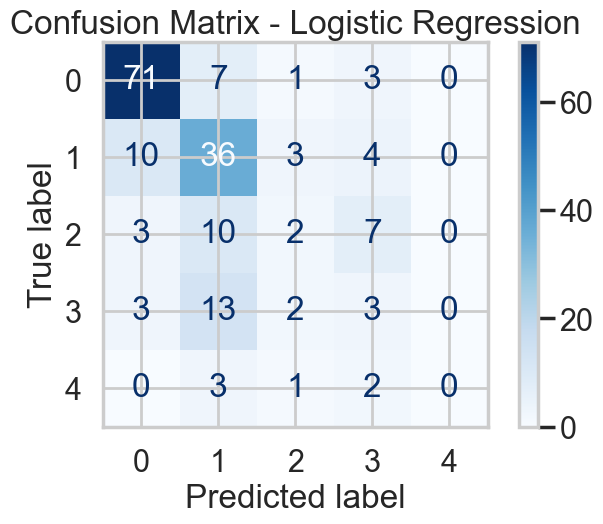

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


📘 Interprétation de la matrice de confusion :
Prédit = 0	Prédit = 1
Réel = 0 (négatif)	Vrai négatif (TN)	Faux positif (FP)
Réel = 1 (positif)	Faux négatif (FN)	Vrai positif (TP)

Vrai Positif (TP) : prédiction correcte de maladie.

Faux Positif (FP) : le modèle prédit une maladie alors qu’il n’y en a pas.

Faux Négatif (FN) : le modèle manque une vraie maladie.

Vrai Négatif (TN) : prédiction correcte de l’absence de maladie.

### ****CONCLUSION**** ###
This logistic regression model shows 61% accuracy.
The “Heart Disease UCI” dataset analysis sets apart several features that can be helpful to predict heart disease severity: 'age', 'thalch', 'trestbps', and 'oldpeak' (see visualizations).
The model shows good precision to identify patients who are not ill: precision (82%) recall (87%), f1-score (84%), support (82%)
Patients with low heart disease severity can also be identified: precision (52%), recall (58%), f1-score (59%), support (53%).
On the contrary, with this model, prediction rate is rather low (22% at the utmost) for patients with moderate to severe heart disease severity.